# Google Play Store Data Analysis



This dataset contains the data of the applications available in google play store and it was created in year 2018-19. This dataset contains 10841 rows and 13 columns.

###  Column Description

* App - Application name
* Category -  Category the app belongs to, there are 34 categories
* Rating - Overall user rating of the app (as when scraped)
* Reviews - Number of user reviews for the app (as when scraped)
* Size - Size of the app (as when scraped)
* Installs - Number of user downloads/installs for the app (as when scraped)
* Type - Paid or Free
* Price - Price of the app (as when scraped)
* Content Rating - Age group the app is targeted at - Children / Mature 21+ / Adult
* Genres - An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to
* Last Updated - Date when the app was last updated on Play Store (as when scraped)
* Current Ver - Current version of the app available on Play Store (as when scraped)
* Android Ver - Min required Android version (as when scraped)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

The dataset is loaded into Dataframe called df using pd.read_csv().

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Prepration and Cleaning

To read dataset we have to import pandas and by using read_csv() function of pandas we can read data which have csv format. After reading we determined it's shape i.e rows and columns ,it's information. We can also find mean ,median ,mode etc. After that we used drop() function to remove coloumns which are not needed for analysis.

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [6]:
# we used drop() function to remove coloumns which are not needed for analysis.
play_store_df = df.drop(['Last Updated','Current Ver','Genres'], axis = 1)

In [7]:
play_store_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Varies with device


In [8]:
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Android Ver'],
      dtype='object')

In [9]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [10]:
len(df['Category'].unique())

34

In [11]:
play_store_df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [12]:
# Dropping '1.9' from the category as there is no such category on the play store.
play_store_df[play_store_df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,NaN


In [13]:
play_store_df = play_store_df.drop(index = 10472)

In [14]:
play_store_df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [15]:
# Checking how many null values are their in each column.
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Android Ver     10838 non-null  object 
dtypes: float64(1), object(9)
memory usage: 931.6+ KB


In [16]:
#Giving mean rating to all the null rating values.
play_store_df['Rating'] = play_store_df['Rating'].fillna(4.2)

In [17]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,4.4 and up


In [18]:
play_store_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Android Ver       2
dtype: int64

In [19]:
# Dropping remaining null values
play_store_df = play_store_df.dropna()

In [20]:
play_store_df[play_store_df['Size'] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Varies with device
...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Varies with device


In [21]:
play_store_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [22]:
# Converting Reviews column to numeric.
play_store_df['Reviews'] = pd.to_numeric(play_store_df['Reviews'])

In [23]:
play_store_df = play_store_df.reset_index(drop=True)

In [24]:
play_store_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10832,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,4.1 and up
10833,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,4.1 and up
10834,Parkinson Exercices FR,MEDICAL,4.2,3,9.5M,"1,000+",Free,0,Everyone,2.2 and up
10835,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Varies with device


In [25]:
play_store_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [26]:
# Removing '+' and ',' from Installs column.
play_store_df['Installs'] = play_store_df['Installs'].str.replace(',',"")
play_store_df['Installs'] = play_store_df['Installs'].str.replace('+',"")

In [27]:
play_store_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0,Everyone,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0,Everyone,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0,Everyone,4.0.3 and up


In [28]:
# Converting Installs columns to numeric.
play_store_df['Installs'] = pd.to_numeric(play_store_df['Installs'])

In [29]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10837 entries, 0 to 10836
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10837 non-null  object 
 1   Category        10837 non-null  object 
 2   Rating          10837 non-null  float64
 3   Reviews         10837 non-null  int64  
 4   Size            10837 non-null  object 
 5   Installs        10837 non-null  int64  
 6   Type            10837 non-null  object 
 7   Price           10837 non-null  object 
 8   Content Rating  10837 non-null  object 
 9   Android Ver     10837 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 846.8+ KB


In [30]:
play_store_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [31]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,4.4 and up


In [32]:
play_store_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
Duolingo: Learn Languages Free                        7
8 Ball Pool                                           7
                                                     ..
CE HPJM 69                                            1
Ninesky Browser                                       1
HACH Cares                                            1
BestCam Selfie-selfie, beauty camera, photo editor    1
Santa Fe Espresso & News                              1
Name: App, Length: 9656, dtype: int64

In [33]:
# Sorting the dataframe with the highest number of reviews.
play_store_df = play_store_df.sort_values('Reviews',ascending=False)

In [34]:
# Dropping duplicate App entry.
play_store_df = play_store_df.drop_duplicates('App').reset_index(drop=True)

In [35]:
play_store_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Varies with device
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Varies with device
2,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0,Teen,Varies with device
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0,Everyone,Varies with device
4,Clash of Clans,GAME,4.6,44893888,98M,100000000,Free,0,Everyone 10+,4.1 and up
...,...,...,...,...,...,...,...,...,...,...
9651,BT Master,FAMILY,4.2,0,222k,100,Free,0,Everyone,1.6 and up
9652,CQ Ukraine,PRODUCTIVITY,4.2,0,9.1M,10,Free,0,Everyone,4.1 and up
9653,DN Managed Mobility App,BUSINESS,4.2,0,3.4M,50,Free,0,Everyone,5.0 and up
9654,SHUTTLLS CQ - Connect Ride Go,TRAVEL_AND_LOCAL,4.2,0,18M,5,Free,0,Everyone,4.3 and up


In [36]:
play_store_df.Price.unique()

array(['0', '$6.99', '$0.99', '$2.99', '$1.99', '$2.49', '$4.99', '$5.99',
       '$4.49', '$9.99', '$3.99', '$1.49', '$3.95', '$7.99', '$3.49',
       '$8.99', '$13.99', '$19.99', '$11.99', '$12.99', '$2.90', '$17.99',
       '$399.99', '$29.99', '$14.99', '$2.95', '$4.77', '$24.99', '$3.90',
       '$2.50', '$3.28', '$1.20', '$2.59', '$9.00', '$1.59', '$1.00',
       '$5.49', '$18.99', '$299.99', '$1.97', '$400.00', '$16.99',
       '$389.99', '$33.99', '$10.00', '$10.99', '$4.84', '$37.99',
       '$1.61', '$8.49', '$4.60', '$79.99', '$4.29', '$1.70', '$1.50',
       '$1.29', '$19.40', '$3.08', '$379.99', '$2.56', '$15.46', '$7.49',
       '$4.59', '$2.00', '$14.00', '$6.49', '$15.99', '$74.99', '$3.88',
       '$89.99', '$3.02', '$39.99', '$5.00', '$1.75', '$2.60', '$4.80',
       '$1.26', '$19.90', '$46.99', '$1.76', '$3.04', '$4.85', '$1.04',
       '$1.96', '$28.99', '$109.99', '$394.99', '$154.99', '$3.61',
       '$25.99', '$30.99', '$200.00'], dtype=object)

In [37]:
# Removing '$' symbol from Price column so that it can be converted to numeric.
play_store_df['Price'] = play_store_df['Price'].str.replace('$','')
play_store_df.Price.unique()

array(['0', '6.99', '0.99', '2.99', '1.99', '2.49', '4.99', '5.99',
       '4.49', '9.99', '3.99', '1.49', '3.95', '7.99', '3.49', '8.99',
       '13.99', '19.99', '11.99', '12.99', '2.90', '17.99', '399.99',
       '29.99', '14.99', '2.95', '4.77', '24.99', '3.90', '2.50', '3.28',
       '1.20', '2.59', '9.00', '1.59', '1.00', '5.49', '18.99', '299.99',
       '1.97', '400.00', '16.99', '389.99', '33.99', '10.00', '10.99',
       '4.84', '37.99', '1.61', '8.49', '4.60', '79.99', '4.29', '1.70',
       '1.50', '1.29', '19.40', '3.08', '379.99', '2.56', '15.46', '7.49',
       '4.59', '2.00', '14.00', '6.49', '15.99', '74.99', '3.88', '89.99',
       '3.02', '39.99', '5.00', '1.75', '2.60', '4.80', '1.26', '19.90',
       '46.99', '1.76', '3.04', '4.85', '1.04', '1.96', '28.99', '109.99',
       '394.99', '154.99', '3.61', '25.99', '30.99', '200.00'],
      dtype=object)

In [38]:
# Converting Price column to numric.
play_store_df['Price'] = pd.to_numeric(play_store_df['Price'])
play_store_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Varies with device
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Varies with device
2,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Varies with device
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Varies with device
4,Clash of Clans,GAME,4.6,44893888,98M,100000000,Free,0.0,Everyone 10+,4.1 and up
...,...,...,...,...,...,...,...,...,...,...
9651,BT Master,FAMILY,4.2,0,222k,100,Free,0.0,Everyone,1.6 and up
9652,CQ Ukraine,PRODUCTIVITY,4.2,0,9.1M,10,Free,0.0,Everyone,4.1 and up
9653,DN Managed Mobility App,BUSINESS,4.2,0,3.4M,50,Free,0.0,Everyone,5.0 and up
9654,SHUTTLLS CQ - Connect Ride Go,TRAVEL_AND_LOCAL,4.2,0,18M,5,Free,0.0,Everyone,4.3 and up


# Exploratory Analysis And Data Visualization

After data preparation and cleaning we will plot graphs for better visualization and understanding, this can be done by importing matplotlib and seaborn libraries of python. These libraries have many functions for ploting graphs between datas of different columns as necessary, which we wil discuss below.

In [39]:
# Creating a new Dataframe called cat_df using groupby() function and passing sum() argument.
cat_df = play_store_df.groupby('Category')[['Installs']].sum()
# Sorting the Dataframe to get top 20 categories with highest installs.
cat_df = cat_df.sort_values('Installs',ascending=False).head(20)
cat_df

,Installs
Category,
GAME,13457924415
COMMUNICATION,11038276251
TOOLS,8102771915
FAMILY,6222542505
PRODUCTIVITY,5793091369
SOCIAL,5487867902
PHOTOGRAPHY,4658147655
VIDEO_PLAYERS,3931902720
TRAVEL_AND_LOCAL,2894887146


### 1. barplot() of seaborn is used to plot bar graph according to the data provided. Here the plot shows the total number of apps of per category installs, it can be computed by bar heights.

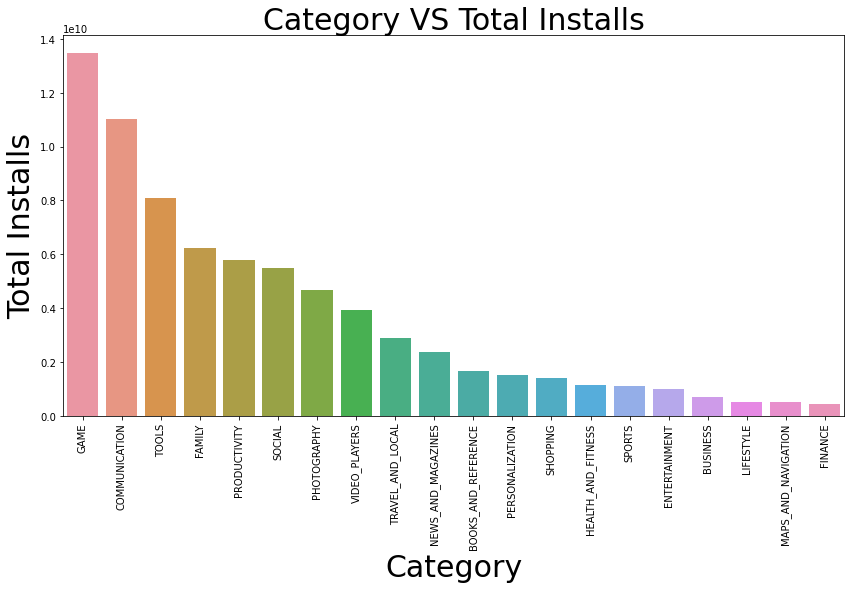

In [40]:
plt.figure(figsize=(14,7),)
plt.title('Category VS Total Installs',fontsize=30);
sns.barplot(x=cat_df.index,y=cat_df['Installs'])
plt.xlabel('Category',fontsize=30)
plt.xticks(rotation=90)
plt.ylabel('Total Installs',fontsize=30)
plt.show()

### 2. Using pie() we are ploting pie chart depicting the percentage of total number of  apps in each category of content rating.

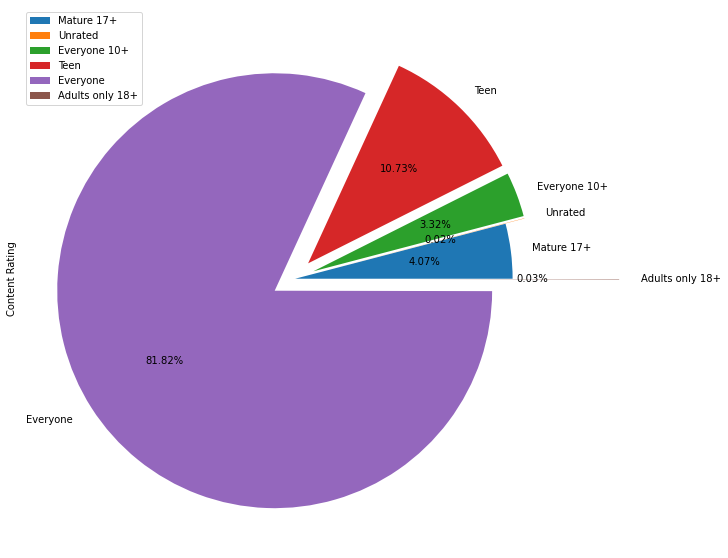

In [65]:
play_store_df['Content Rating'].value_counts(sort=False).plot.pie(autopct='%1.2f%%',figsize=(40,10),explode=[0.01,0.1,0.1,0.1,0.1,0.5]);
plt.legend();

### Ploting barplot between Content Rating and total no of apps.

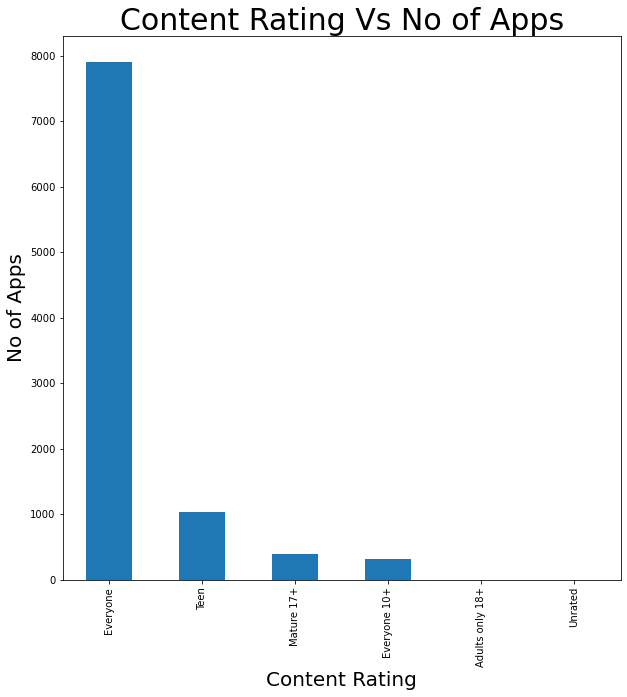

In [42]:
play_store_df['Content Rating'].value_counts().plot(kind='bar',figsize=(10,10));
plt.title('Content Rating Vs No of Apps',fontsize=30)
plt.xlabel('Content Rating',fontsize=20)
plt.ylabel('No of Apps',fontsize=20);

### 3. barplot() of seaborn is used to plot bar graph according to the data provided. Here the plot shows the average rating of free and paid apps per category, it can be computed by bar heights.

In [43]:
type_df = pd.DataFrame(play_store_df.groupby(['Type','Category'])['Rating'].mean())

In [44]:
type_df

Rating
Type Category                     
Free ART_AND_DESIGN       4.334483
     AUTO_AND_VEHICLES    4.186585
     BEAUTY               4.262264
     BOOKS_AND_REFERENCE  4.323196
     BUSINESS             4.137255
...                            ...
Paid SPORTS               4.250000
     TOOLS                4.175641
     TRAVEL_AND_LOCAL     4.133333
     VIDEO_PLAYERS        4.100000
     WEATHER              4.350000

[63 rows x 1 columns]

In [45]:
free_df = type_df.loc['Free']
free_df

,Rating
Category,
ART_AND_DESIGN,4.334483
AUTO_AND_VEHICLES,4.186585
BEAUTY,4.262264
BOOKS_AND_REFERENCE,4.323196
BUSINESS,4.137255
COMICS,4.182143
COMMUNICATION,4.140625
DATING,4.027273
EDUCATION,4.338835


In [46]:
paid_df = type_df.loc['Paid']
paid_df

,Rating
Category,
ART_AND_DESIGN,4.733333
AUTO_AND_VEHICLES,4.333333
BOOKS_AND_REFERENCE,4.221429
BUSINESS,4.108333
COMMUNICATION,4.088889
DATING,4.060000
EDUCATION,4.800000
ENTERTAINMENT,4.600000
EVENTS,4.200000


In [47]:
type_df2 = pd.merge(paid_df,free_df,on='Category',suffixes=('_paid','_free'))
type_df2

,Rating_paid,Rating_free
Category,,
ART_AND_DESIGN,4.733333,4.334483
AUTO_AND_VEHICLES,4.333333,4.186585
BOOKS_AND_REFERENCE,4.221429,4.323196
BUSINESS,4.108333,4.137255
COMMUNICATION,4.088889,4.140625
DATING,4.060000,4.027273
EDUCATION,4.800000,4.338835
ENTERTAINMENT,4.600000,4.118824
EVENTS,4.200000,4.368254


In [48]:
type_df2['Rating Diff'] = type_df2['Rating_paid'] - type_df2['Rating_free']
type_df2

,Rating_paid,Rating_free,Rating Diff
Category,,,
ART_AND_DESIGN,4.733333,4.334483,0.398851
AUTO_AND_VEHICLES,4.333333,4.186585,0.146748
BOOKS_AND_REFERENCE,4.221429,4.323196,-0.101767
BUSINESS,4.108333,4.137255,-0.028922
COMMUNICATION,4.088889,4.140625,-0.051736
DATING,4.060000,4.027273,0.032727
EDUCATION,4.800000,4.338835,0.461165
ENTERTAINMENT,4.600000,4.118824,0.481176
EVENTS,4.200000,4.368254,-0.168254


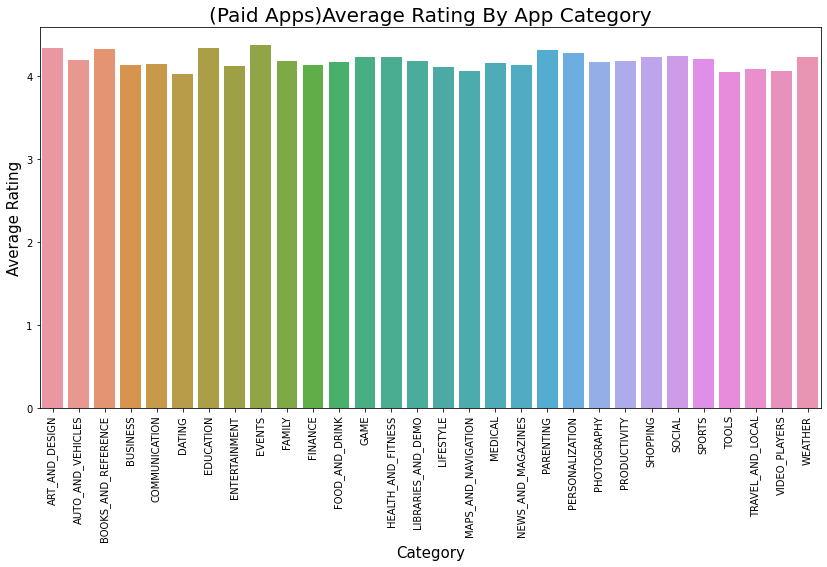

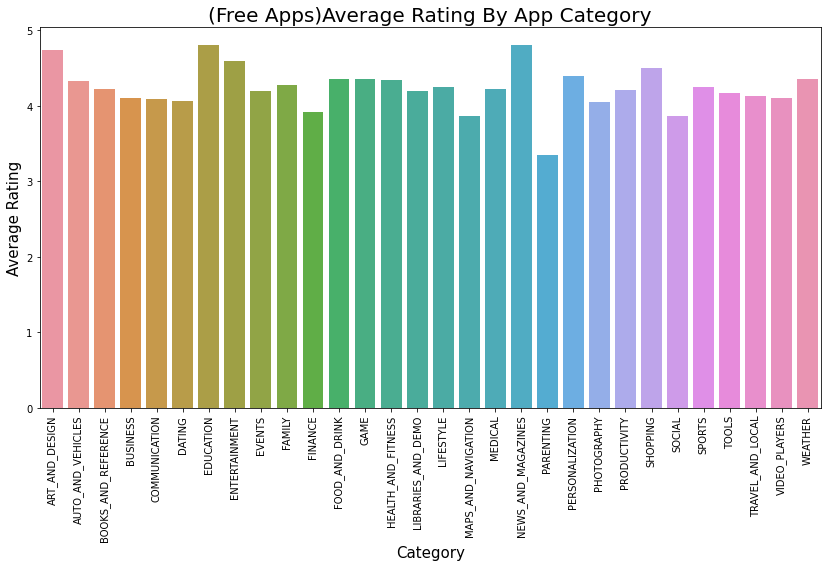

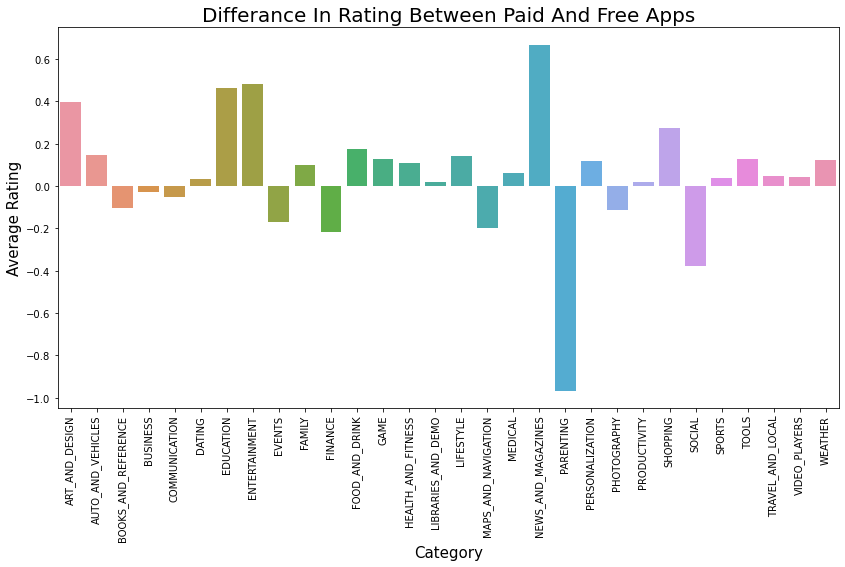

In [49]:
plt.figure(figsize=(14,7))
plt.title('(Paid Apps)Average Rating By App Category',fontsize=20)
sns.barplot(x=type_df2.index,y=type_df2['Rating_free'])
plt.xlabel('Category',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Average Rating',fontsize=15)
plt.show()

plt.figure(figsize=(14,7))
plt.title('(Free Apps)Average Rating By App Category',fontsize=20)
sns.barplot(x=type_df2.index,y=type_df2['Rating_paid'])
plt.xlabel('Category',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Average Rating',fontsize=15)
plt.show()

plt.figure(figsize=(14,7))
plt.title('Differance In Rating Between Paid And Free Apps',fontsize=20)
sns.barplot(x=type_df2.index,y=type_df2['Rating Diff'])
plt.xlabel('Category',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Average Rating',fontsize=15)
plt.show()

### 4. plot() function of Matplotlib is used to plot line graph, where we are plotting Content Rating vs Total Installs.

In [51]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Varies with device
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Varies with device
2,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Varies with device
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Varies with device
4,Clash of Clans,GAME,4.6,44893888,98M,100000000,Free,0.0,Everyone 10+,4.1 and up


In [52]:
con_inst_df = pd.DataFrame(play_store_df.groupby('Content Rating')['Installs'].sum())
con_inst_df

,Installs
Content Rating,
Adults only 18+,2000000
Everyone,52378930861
Everyone 10+,4016271795
Mature 17+,2437986878
Teen,16487275393
Unrated,50500


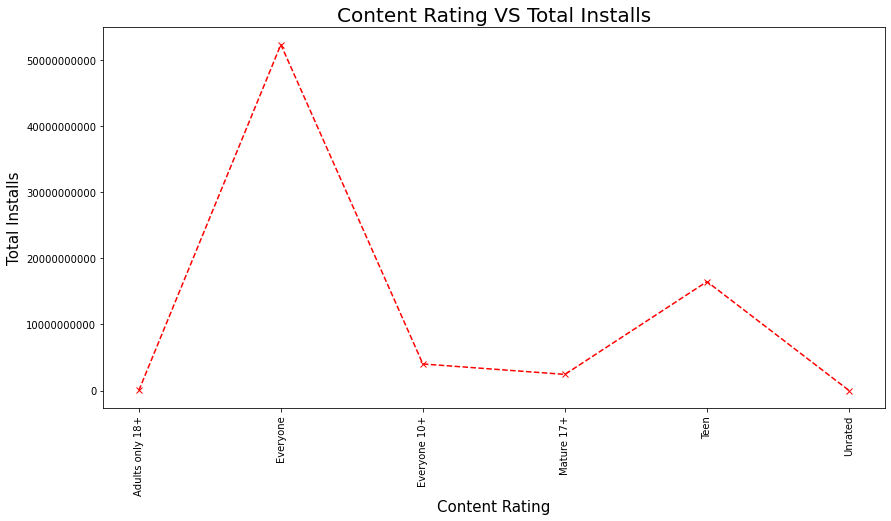

In [53]:
plt.figure(figsize=(14,7))
plt.title('Content Rating VS Total Installs',fontsize=20)
plt.plot(con_inst_df.index,con_inst_df.Installs,'x--r')
plt.xlabel('Content Rating',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Total Installs',fontsize=15)
plt.ticklabel_format(style = 'plain',axis='y');

### 5. pairplot() : To plot multiple pairwise bivariate distributions in a dataset.

C:\Users\sudha\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sudha\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


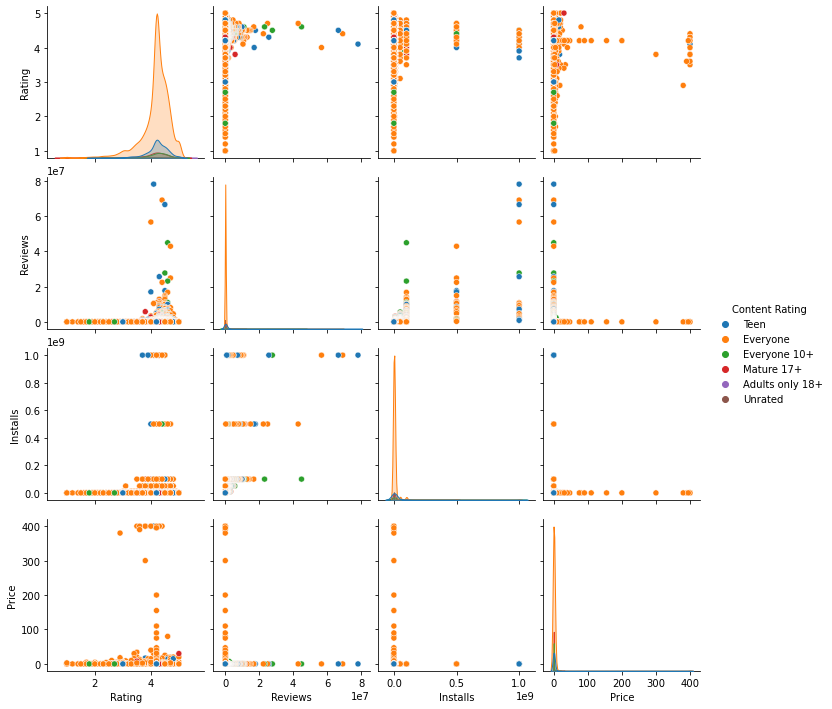

In [54]:
sns.pairplot(play_store_df, hue='Content Rating',height=2.5);

## Ask And Answer Questions

### Q1 - Considering reviews and ratings, which factor has more impact on the number of installations?

In [55]:
q1_df = play_store_df.groupby('Category')[['Installs','Rating','Reviews']].mean()

In [56]:
q1_df

,Installs,Rating,Reviews
Category,,,
ART_AND_DESIGN,1.856362e+06,4.354098,23115.508197
AUTO_AND_VEHICLES,6.250613e+05,4.191765,13690.188235
BEAUTY,5.131519e+05,4.262264,7476.226415
BOOKS_AND_REFERENCE,7.504367e+06,4.310360,75328.256757
BUSINESS,1.659916e+06,4.136429,23550.054762
COMICS,8.032348e+05,4.182143,41828.553571
COMMUNICATION,3.504215e+07,4.136190,907378.038095
DATING,8.289712e+05,4.028235,21316.717647
EDUCATION,1.799533e+06,4.347619,55089.419048


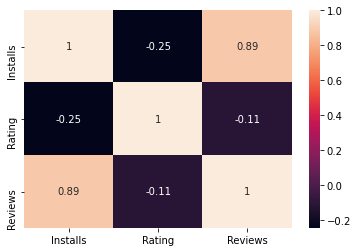

In [57]:
sns.heatmap(q1_df.corr(),annot=True);

From analysing the heatmap we can see that reviews are more impactful than ratings. Number of installs depends on reviews rather than rating as we can see the correlation between Installs and Reviews is positive while the correlation between Installs and Rating is negetive.

### Q2 -  Top 30 most installed apps.

In [58]:
q2_df = play_store_df.sort_values('Installs',ascending=False).head(30)

<ipython-input-59-ac3e5b6c7a6d>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


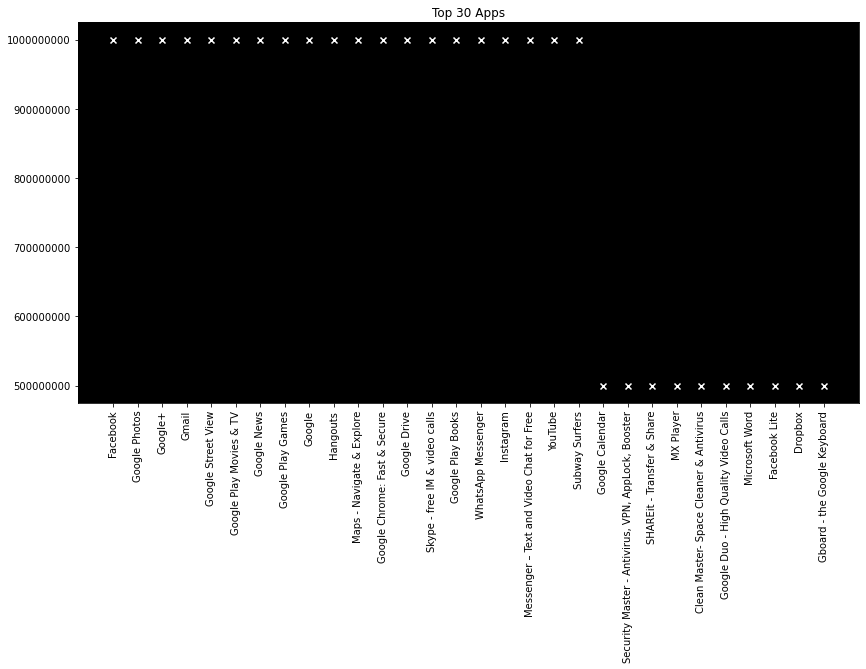

In [59]:
#Scatter Plot
plt.figure(figsize=(14,7))
plt.title('Top 30 Apps')
plt.scatter(x=q2_df.App,y=q2_df.Installs,marker='x',color='white')
plt.xticks(rotation =90)
plt.ticklabel_format(style='plain',axis='y')
ax = plt.axes()
ax.set_facecolor("black");

### Q3 -  Find free apps with Rating greater than 4.8 and 10,000+ installs.

In [60]:
q3_df = play_store_df[(play_store_df['Rating'] > 4.8) & (play_store_df['Price']== 0) & (play_store_df['Installs'] >= 10000)]

In [61]:
q3_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
370,JW Library,BOOKS_AND_REFERENCE,4.9,922752,Varies with device,10000000,Free,0.0,Everyone,Varies with device
850,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13M,10000000,Free,0.0,Everyone,4.2 and up
1038,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,1000000,Free,0.0,Everyone,4.1 and up
1271,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26M,1000000,Free,0.0,Everyone,4.2 and up
1735,StrongLifts 5x5 Workout Gym Log & Personal Tra...,HEALTH_AND_FITNESS,4.9,66791,10M,1000000,Free,0.0,Everyone,Varies with device
1871,PixPanda - Color by Number Pixel Art Coloring ...,FAMILY,4.9,55723,14M,1000000,Free,0.0,Everyone,4.0.3 and up
1950,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,1000000,Free,0.0,Everyone,4.1 and up
2011,Hungry Hearts Diner: A Tale of Star-Crossed Souls,FAMILY,4.9,46253,56M,500000,Free,0.0,Everyone 10+,4.0 and up
2186,Lose Belly Fat in 30 Days - Flat Stomach,HEALTH_AND_FITNESS,4.9,38098,11M,5000000,Free,0.0,Everyone,4.2 and up
2202,Solitaire: Decked Out Ad Free,GAME,4.9,37302,35M,500000,Free,0.0,Everyone,4.1 and up


### Q4 -  Find the apps with low rating and high cost.

In [62]:
q4_df = play_store_df[(play_store_df['Rating'] <= 3) & (play_store_df['Price'] >= 5)]

In [63]:
q4_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
6897,InfantRisk Center HCP,MEDICAL,2.6,41,14M,1000,Paid,9.99,Everyone,2.3.3 and up
6905,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,4.0 and up
7156,SkyTest BU/GU Lite,BUSINESS,2.9,28,20M,500,Paid,17.99,Everyone,3.0 and up


### Q5 - Which is the most supported android version?

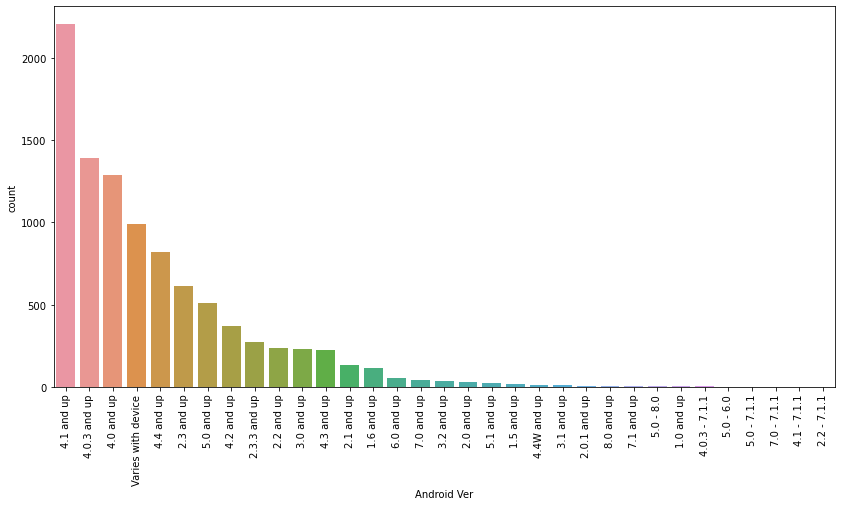

In [64]:
plt.figure(figsize=(14,7))
sns.countplot(x='Android Ver',data=play_store_df,order=play_store_df['Android Ver'].value_counts().index)
plt.xticks(rotation =90);

* Android version 4.1 is the most supported android version.

## Summary And Conclusion

#### From the above analysis we can conclude that:-
    *  Among all the categories 'Game' category has the highest number of installs.
    *  81.82% apps are rated 'Everyone'.
    *  Reviews impact number of Installs more than Rating.
    *  Apps by Google and Facebook are among the most installed apps.
    *  Majority of the apps are built on android version 4.1.

## Link and References

* Dataset taken from – 
    
    https://www.kaggle.com/lava18/google-play-store-apps


* Documentation – 
    
    https://numpy.org/doc/
    
    https://pandas.pydata.org/docs/
    
    https://matplotlib.org/stable/contents.html
    
    https://seaborn.pydata.org

